<a href="https://colab.research.google.com/github/galaxy-kim/Python_note_backup/blob/main/05_jan_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##상관관계 분석

In [ ]:
import pandas as pd

!pip install pingouin
!pip install scikit_posthocs

import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/Ashopping2.csv",encoding="cp949")
df1

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
df1.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [ ]:
df2=df1[["총_매출액","방문빈도","1회_평균매출액","총_할인_금액","구매_카테고리_수","고객_나이대","거래기간"]]

df2.corr(method="pearson")

#제거기준 : 0.7

,총_매출액,방문빈도,1회_평균매출액,총_할인_금액,구매_카테고리_수,고객_나이대,거래기간
총_매출액,1.000000,0.631171,0.314133,-0.004880,0.308347,0.027746,0.150971
방문빈도,0.631171,1.000000,-0.279690,0.044814,0.395861,0.010255,0.242049
1회_평균매출액,0.314133,-0.279690,1.000000,-0.018000,-0.151587,0.017247,-0.182621
총_할인_금액,-0.004880,0.044814,-0.018000,1.000000,0.022649,0.062236,0.018527
구매_카테고리_수,0.308347,0.395861,-0.151587,0.022649,1.000000,-0.003501,0.163870
고객_나이대,0.027746,0.010255,0.017247,0.062236,-0.003501,1.000000,0.037836
거래기간,0.150971,0.242049,-0.182621,0.018527,0.163870,0.037836,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


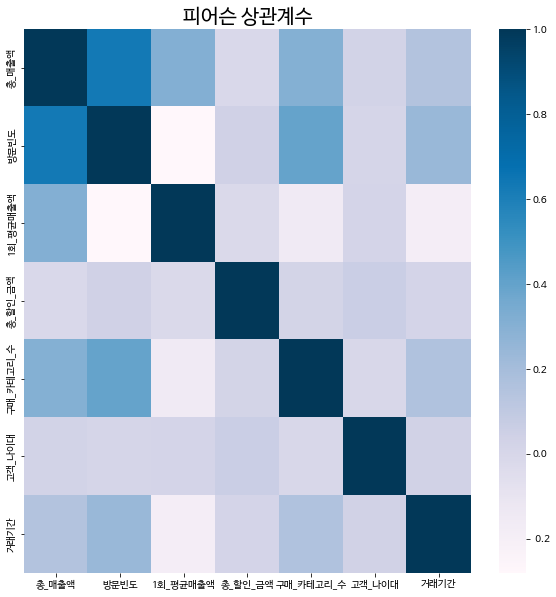

In [ ]:
matplotlib.rcParams['font.family']="NanumBarunGothic"
colormap=plt.cm.PuBu
plt.figure(figsize=(10,10))
plt.title("피어슨 상관계수",fontsize = 20)
sns.heatmap(df2.astype(float).corr(),cmap=colormap)

##주성분 분석

In [ ]:
from sklearn.decomposition import PCA
df=df1

In [ ]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [ ]:
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [ ]:
#결측값 제거

df=df.dropna(axis=0)
df.isnull().sum()

#dropna 작동 불가 시 옵션 inplace=True 추가

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [ ]:
#feature=특성=독립변수

features=['고객ID', '이탈여부', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성']

In [ ]:
x=df.drop(["총_매출액"],axis=1).values
y=df["총_매출액"].values
x=StandardScaler().fit_transform(x)
x=pd.DataFrame(x,columns=features)
x

,고객ID,이탈여부,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,-1.732022,-0.267091,-0.441573,-0.349867,-1.802715,-2.584469,-0.606201,0.906277,-0.907907,0.728382,...,0.304803,1.359596,0.388037,0.248061,0.369038,0.709074,0.575894,0.365703,0.635247,0.673617
1,-1.721671,-0.267091,-0.441573,0.137952,-1.802715,-2.586715,-0.606201,0.906277,1.101434,-0.110754,...,0.304803,0.189258,-0.977399,0.248061,0.369038,0.709074,0.575894,0.365703,-0.621795,0.673617
2,-1.718221,-0.267091,2.241133,-0.552582,-0.847100,-0.420127,-0.606201,-1.107406,-0.907907,0.728382,...,-0.921700,0.189258,0.388037,0.248061,-0.872407,-0.373197,0.575894,0.365703,-0.621795,0.673617
3,-1.714771,-0.267091,-0.010424,-0.811139,0.466871,0.494421,-0.606201,0.906277,-0.907907,-0.110754,...,0.304803,0.189258,0.388037,0.248061,-0.872407,-0.373197,-0.433120,0.365703,0.635247,-0.675221
4,-1.711321,-0.267091,-0.968534,0.330748,1.661390,0.789103,-0.606201,-2.114247,-0.907907,0.728382,...,-2.148203,-0.981080,0.388037,-2.311684,0.369038,-0.373197,-1.442135,-0.864521,-0.621795,-2.024058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1.697454,-0.267091,-0.297857,1.291217,0.825227,0.784162,-0.606201,-0.100564,-0.907907,1.567518,...,1.531305,1.359596,0.388037,-1.031812,0.369038,1.791344,0.575894,0.365703,0.635247,0.673617
837,1.700905,-0.267091,-0.872723,1.386849,-1.563812,-2.234084,-0.606201,-0.100564,1.101434,0.728382,...,0.304803,0.189258,1.753473,0.248061,1.610483,0.709074,0.575894,0.365703,0.635247,0.673617
838,1.704355,-0.267091,1.091402,-0.457561,-1.205456,-0.957428,-0.606201,-1.107406,-0.907907,0.728382,...,0.304803,1.359596,0.388037,-1.031812,0.369038,-0.373197,1.584908,0.365703,0.635247,0.673617
839,1.711255,-0.267091,-0.537384,1.854534,0.466871,0.490423,-0.606201,-0.100564,-0.907907,-0.110754,...,-0.921700,-2.151418,-2.342835,-2.311684,-2.113852,-1.455467,-0.433120,-0.864521,-1.878838,-2.024058


In [ ]:
#x를 묶어보자

pca=PCA(random_state=105)

In [ ]:
import numpy as np

x_pca=pca.fit_transform(x)
pd.Series(np.cumsum(pca.explained_variance_ratio_))

#cumsum ; cumulate sum누적합

0     0.162329
1     0.283895
2     0.353646
3     0.411711
4     0.461924
5     0.505541
6     0.544843
7     0.582341
8     0.616934
9     0.645848
10    0.673056
11    0.698606
12    0.723489
13    0.747585
14    0.768625
15    0.788657
16    0.807985
17    0.825499
18    0.842408
19    0.857553
20    0.872564
21    0.886608
22    0.899589
23    0.911920
24    0.923865
25    0.935792
26    0.946320
27    0.955307
28    0.963788
29    0.971105
30    0.977672
31    0.983139
32    0.988481
33    0.992303
34    0.995849
35    0.998250
36    1.000000
37    1.000000
dtype: float64

In [ ]:
pca=PCA(n_components=16)
principalComponents=pca.fit_transform(x)
principalDF=pd.DataFrame(data=principalComponents,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16'])

principalDF

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
0,-3.144307,0.146833,-0.613312,1.133834,3.288293,-0.579215,0.225345,0.061814,0.252499,-0.310304,1.766094,0.701895,0.402005,0.679301,0.340008,-0.365163
1,-0.411059,-0.926131,-0.972511,-1.124333,2.888712,-0.270007,-1.316288,-0.232814,-1.323824,-0.662983,1.617341,-0.241985,0.837056,-0.229008,-0.013916,0.246082
2,-0.380785,3.514350,0.459955,-0.078602,0.641715,1.632156,-1.457891,-0.558555,2.010455,-0.843858,1.701459,0.140512,0.059575,-0.461187,0.838654,1.151855
3,-2.241323,1.239150,-0.605088,2.686435,-0.343624,0.211287,1.961787,-1.007951,-0.078042,1.669667,2.263459,0.130395,1.066424,-0.485924,-0.874397,-1.346256
4,4.258377,-0.430623,0.022514,-1.880014,-1.478997,-1.193939,1.316818,0.921775,0.986001,-1.541912,0.916701,1.531724,-0.416864,0.384188,1.179543,-1.730874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-2.987049,1.318456,0.479157,-1.015711,-0.573696,-0.540634,0.470016,2.015592,0.534111,1.115332,-0.185106,-0.607504,-1.150497,-0.603145,-2.334073,-0.038656
837,-1.649440,-2.179772,-1.138832,-1.471333,2.512442,-0.407742,-0.552873,3.736345,-0.475650,-0.016589,-2.163773,0.328168,-0.445574,3.164843,0.925263,0.680210
838,-2.388693,1.843327,0.336589,-1.289132,1.390706,1.193122,-0.502230,-0.979705,1.652626,1.227719,-0.826359,-0.987975,-1.267024,-0.808926,-0.775377,0.542563
839,5.868142,1.084344,0.033044,-0.345298,-0.119867,-0.266840,-0.478247,2.226402,0.910841,1.310547,-0.311899,-0.556626,-0.869525,-0.430386,-0.564974,-1.234029
